# Heart Disease Prediction

## Read in data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

cleveland= pd.read_csv('datasets/cleveland.csv', names= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
# Naming dataframe
cleveland.name = "Cleveland Dataset"

statlog= pd.read_csv('datasets/statlog.csv',  names= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
# Naming dataframe
statlog.name = "Statlog Dataset"

df = [cleveland, statlog]

In [2]:
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
statlog.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


### Convert target variable to binary form (0  = no heart disease, 1 = heart disease)

In [4]:
# Cleveland dataset
cleveland['target'].replace([1,2,3,4], 1, inplace = True)

# Starlog dataset
statlog['target'].replace([1,2], [0,1], inplace = True)

# cleveland_dataset = cleveland_dataset.replace({
#     'target': (1,2,3,4)
# }, 1)

# cleveland_dataset.head()

## Exploratory data analysis

In [5]:
# cleveland_dataset.describe()


for i in df:
    print(i.name)
    print(i.describe())
    print('\n')

Cleveland Dataset
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      

### Checking for missing values

In [6]:
for i in df:
    print(i.name)
    print(i.isnull().sum())
    print('\n')
    
# for col_name in cleveland.columns: 
#     print ("column:",col_name,".Missing:",sum(cleveland[col_name].isnull()))

Cleveland Dataset
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


Statlog Dataset
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64




In [7]:
# Filling missing values with the mode
cleveland['ca'].fillna(cleveland['ca'].mode()[0], inplace=True)

cleveland['thal'].fillna(cleveland['thal'].mode()[0], inplace=True)

TypeError: 'str' object is not callable

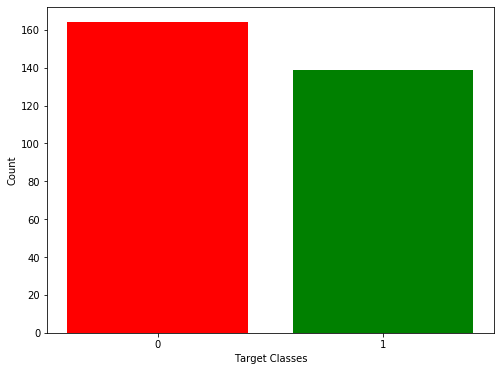

In [29]:
# for dataset in df:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), cleveland['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')